# ghcn_cleaning:
    Import, explore, visualize, clean and transform GHCN data for station USC00086700

In [64]:
# Declare Variables

In [78]:
ghcn_df = ''  # Original GHCN Data in its raw format as a data frame
rm_missing_column = ''  #  GHCN Data after removing columns where all values are missing
replace_missing_fields = '' # GHCN Data after replacing all missing fields with null
rm_commas = ''  # GHCN Data after the final transformation of removing commas from the attribute columns.
date_conversions = '' # GHCN data after converting Date to Date-type and changing format
ghcn_cleaned = '' # The final result after cleaning and all of the transofrmations are performed

In [79]:
# Import Data

In [80]:
import pandas as pd
ghcn_df = pd.read_csv("./Datasets/GHCN_Data/Raw_Data/USC00086700.csv")
# ghcn_df 

## Initial Data Exploration & Visualization
    Get Data types, Null values, and more

In [81]:
ghcn_df.info()
ghcn_df.head()
ghcn_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          1534 non-null   object 
 1   DATE             1534 non-null   object 
 2   LATITUDE         1534 non-null   float64
 3   LONGITUDE        1534 non-null   float64
 4   ELEVATION        0 non-null      float64
 5   NAME             1534 non-null   object 
 6   PRCP             1374 non-null   float64
 7   PRCP_ATTRIBUTES  1374 non-null   object 
 8   TMAX             379 non-null    float64
 9   TMAX_ATTRIBUTES  379 non-null    object 
 10  TMIN             378 non-null    float64
 11  TMIN_ATTRIBUTES  378 non-null    object 
dtypes: float64(6), object(6)
memory usage: 143.9+ KB


,LATITUDE,LONGITUDE,ELEVATION,PRCP,TMAX,TMIN
count,1.534000e+03,1.534000e+03,0.0,1374.000000,379.000000,378.000000
mean,2.893333e+01,-8.203333e+01,NaN,38.158661,265.562005,178.896825
std,3.553872e-15,1.421549e-14,NaN,114.761386,57.825712,73.507844
min,2.893333e+01,-8.203333e+01,NaN,0.000000,50.000000,-33.000000
25%,2.893333e+01,-8.203333e+01,NaN,0.000000,239.000000,133.000000
50%,2.893333e+01,-8.203333e+01,NaN,0.000000,278.000000,208.500000
75%,2.893333e+01,-8.203333e+01,NaN,0.000000,311.000000,239.000000
max,2.893333e+01,-8.203333e+01,NaN,1524.000000,361.000000,272.000000


## Data Cleaning

In [82]:
# Remove Columns with missing values

In [83]:
rm_missing_column = ghcn_df.dropna(axis=1, how='all')
# rm_missing_column

In [84]:
# Handle other missing fields.. AI is not particularly fond of missing data... ':D

In [85]:
replace_missing_fields = rm_missing_column.fillna('null')
# replace_missing_fields

In [86]:
# Remove Commas from table

In [87]:
rm_commas = replace_missing_fields.replace(',', '', regex=True)
# rm_commas


In [88]:
date_conversions = rm_commas
date_conversions['DATE'] = pd.to_datetime(date_conversions['DATE'], format ='%Y-%m-%d').dt.strftime('%m-%d-%Y')
ghcn_cleaned = date_conversions

## Additional Data Visualizations


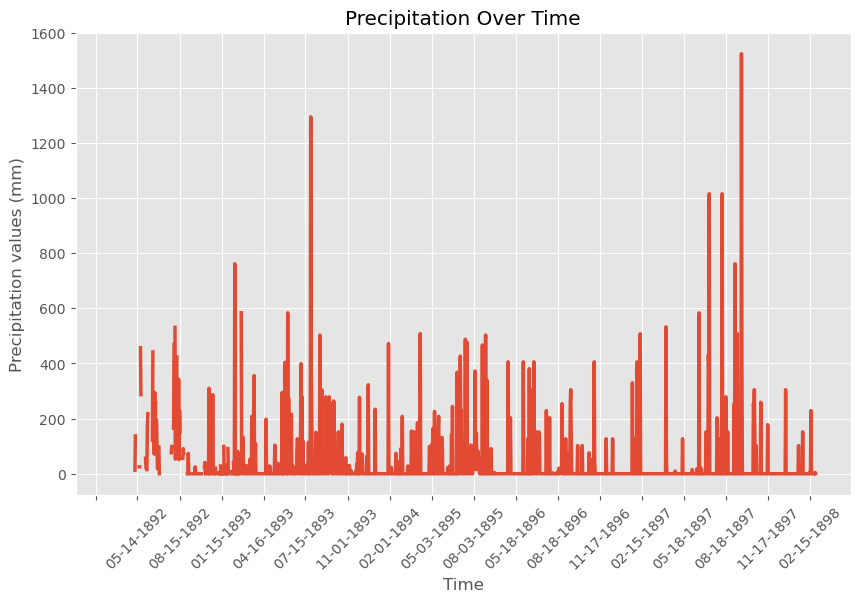

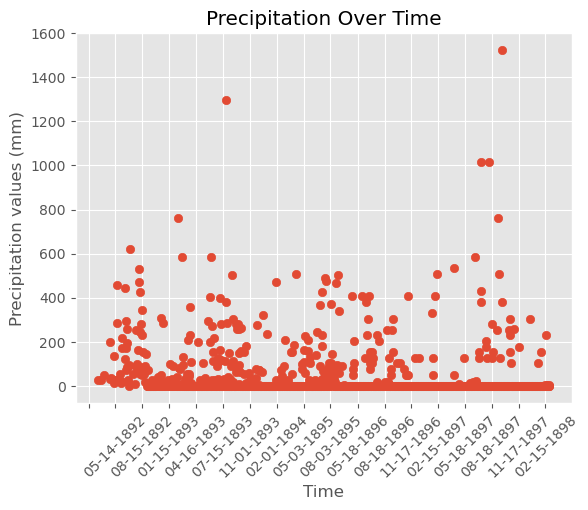

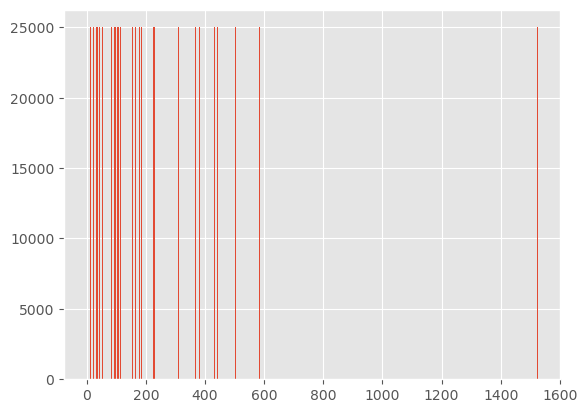

(array([1.212e+03, 7.300e+01, 3.800e+01, 2.400e+01, 1.200e+01, 8.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  101.6,  203.2,  304.8,  406.4,  508. ,  609.6,  711.2,
         812.8,  914.4, 1016. , 1117.6, 1219.2, 1320.8, 1422.4, 1524. ]),
 <BarContainer object of 15 artists>)

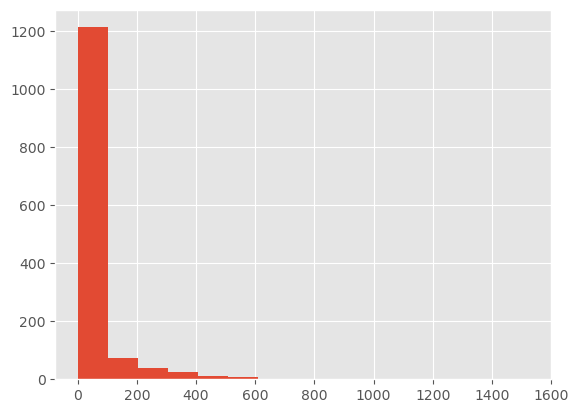

In [143]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import matplotlib.dates as mdates
import mplcursors

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(ghcn_cleaned['DATE'], ghcn_df['PRCP'], linewidth=2.5)
plt.style.use('ggplot')
plt.title("Precipitation Over Time")
plt.xlabel("Time")
plt.ylabel("Precipitation values (mm)")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
mplcursors.cursor(hover=True)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

# plt.xticks([1892, 1893, 1894, 1895, 1896, 1897 , 1898], ["1892", "1893", "1894", "1895", "1896", "1897", "1898" ])
plt.show()

# Scatter Plot
plt.scatter(ghcn_cleaned['DATE'], ghcn_df['PRCP'])
plt.title("Precipitation Over Time")
plt.xlabel("Time")
plt.ylabel("Precipitation values (mm)")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.show()

# Bar Graph
plt.bar(ghcn_df['PRCP'], height=25000)
plt.show()

#Histograph
plt.hist(ghcn_df['PRCP'], bins=15)

count    1374.000000
mean       38.158661
std       114.761386
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1524.000000
Name: PRCP, dtype: float64

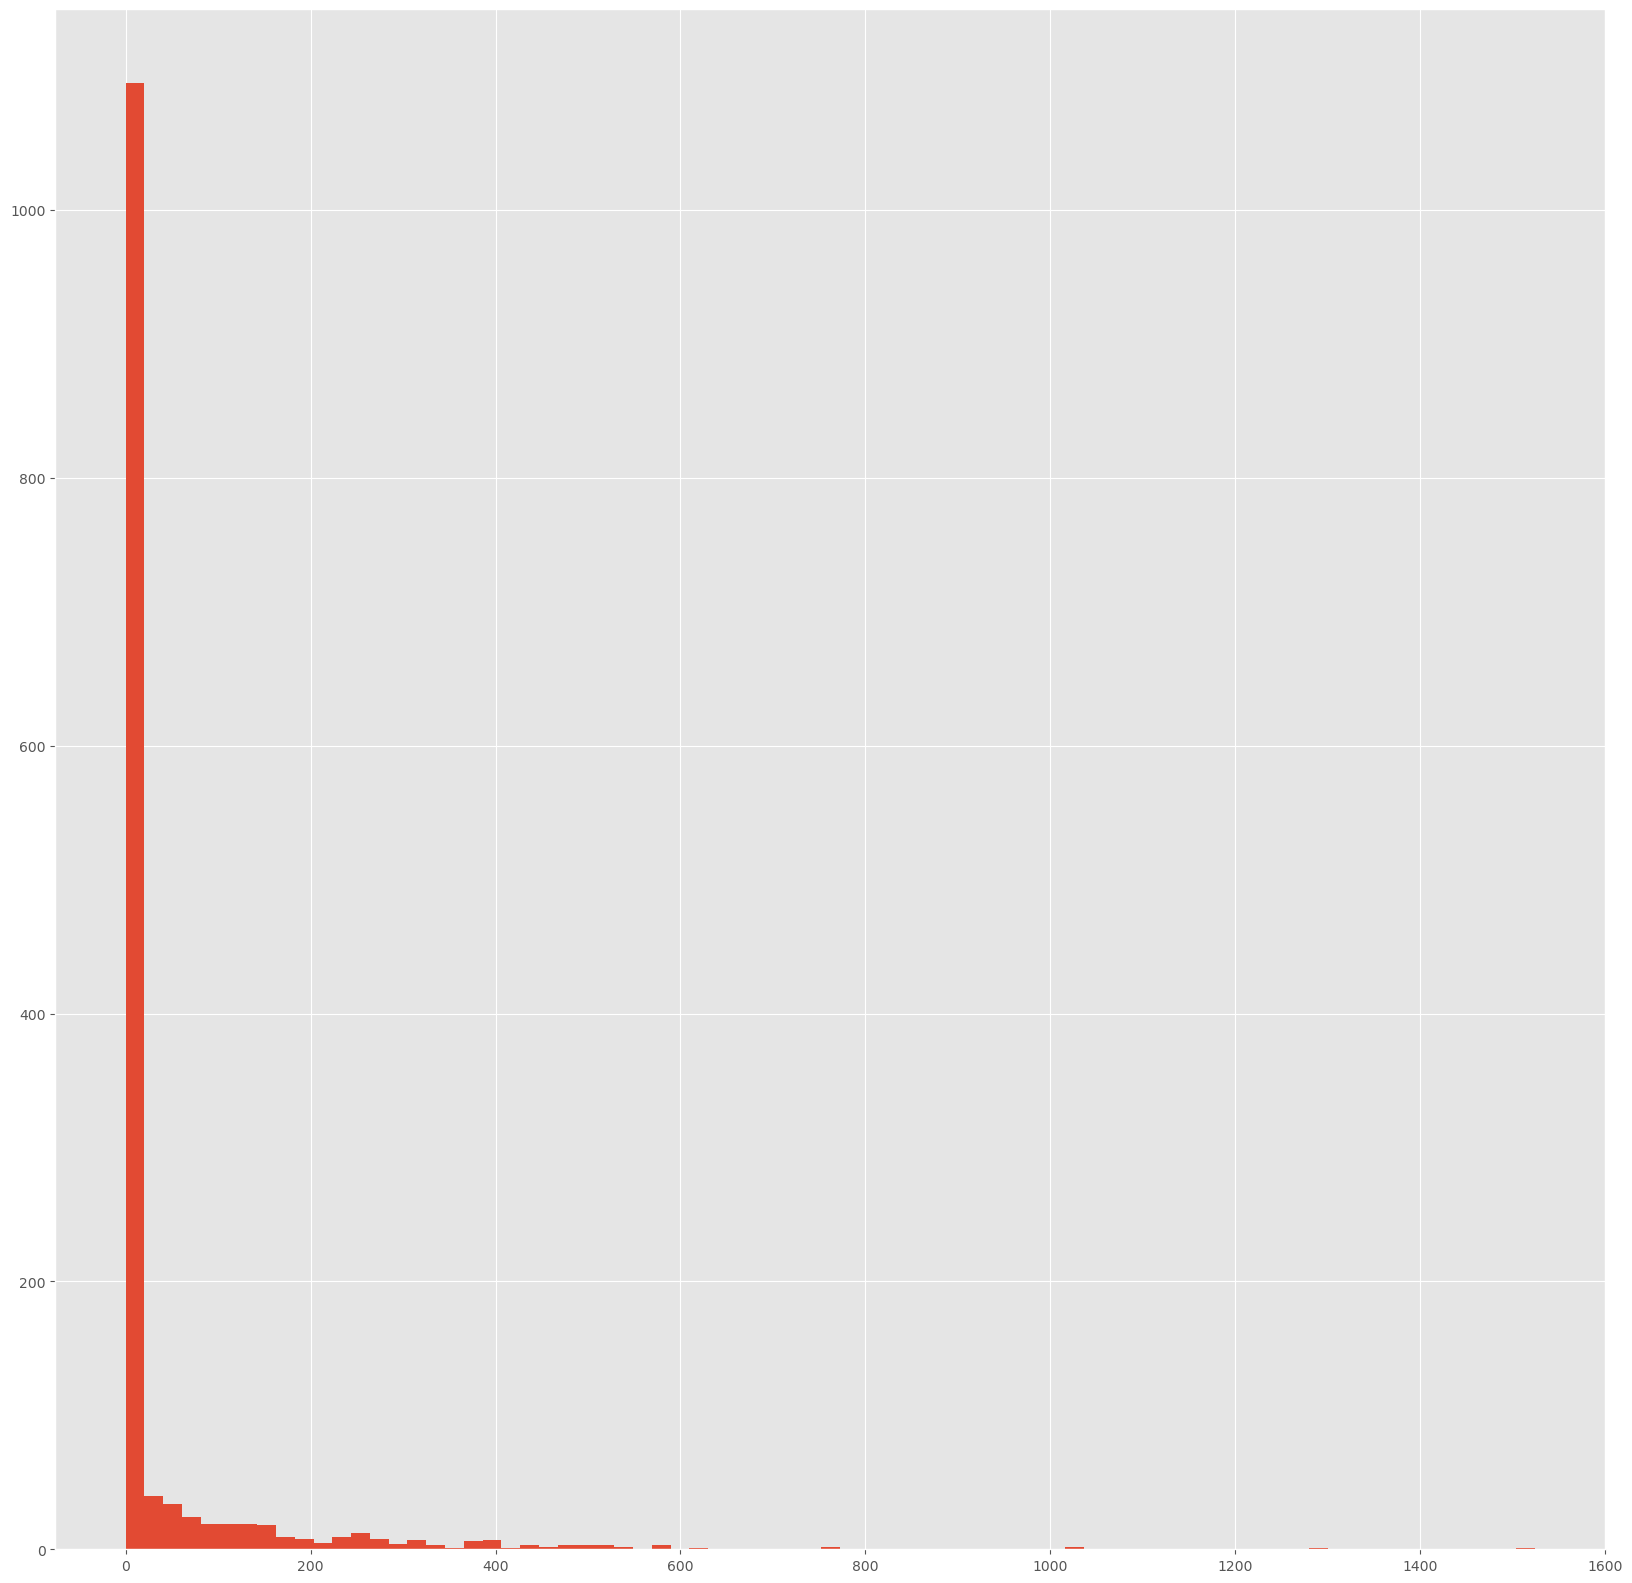

In [153]:
import shap
X = ghcn_cleaned['DATE']
y = ghcn_df['PRCP']



display(y.describe())
hist = y.hist(bins=75, figsize=(20, 20))